In [1]:
import matplotlib.pyplot as plt

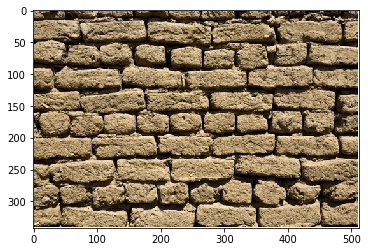

In [2]:
data = plt.imread('unnamed.jpg')
plt.imshow(data)

In [3]:
data.shape

(342, 512, 3)

In [ ]:
#!pip install keras

In [5]:
from keras.datasets import fashion_mnist

In [7]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

In [8]:
X_train.shape

(60000, 28, 28)

In [25]:
Y_train[:4]

array([9, 0, 0, 3], dtype=uint8)

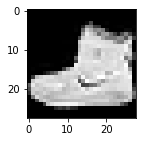

In [19]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

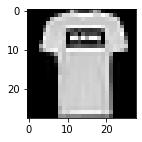

In [20]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

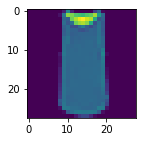

In [22]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

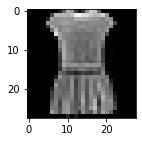

In [26]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [27]:
# reshape dataset to have a single channel
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [38]:
from keras.utils import to_categorical

In [39]:
# one hot encode target values
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [40]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [41]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [42]:
Y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [43]:
Y_train[3]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [44]:
# convert from integers to floats
train_norm = X_train.astype('float32')
test_norm = X_test.astype('float32')

# normalize to range 0-1
train_norm = train_norm /255.0
test_norm = test_norm /255.0

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [47]:
# define cnn model

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# compile model
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
from sklearn.model_selection import KFold

The model will be evaluated using 5-fold cross-validation. The value of k=5 was chosen to provide a baseline for both repeated evaluation and to not be too large as to require a long running time. Each test set will be 20% of the training dataset,
or about 12,000 examples, close to the size of the actual test set for this problem.

The training dataset is shuffled prior to being split and the sample shuffling is performed each time so that
any model we evaluate will have the same train and test datasets in each fold, providing an apples-to-apples comparison.

We will train the baseline model for a modest 10 training epochs with a default batch size of 32 examples.
The test set for each fold will be used to evaluate the model both during each epoch of the training run,
so we can later create learning curves, and at the end of the run, so we can estimate the performance of the model.
As such, we will keep track of the resulting history from each run, as well as the classification accuracy of the fold.

In [50]:
# evaluate a model using k-fold cross-validation
n_folds = 10

scores = []
histories = []

# prepare cross validation
kfold = KFold(n_folds, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(train_norm):

    # select rows for train and test
    trainX, trainY, testX, testY = train_norm[train_ix], Y_train[train_ix], train_norm[test_ix], Y_train[test_ix]
    # fit model
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    print('> %.3f' % (acc * 100.0))
    # append scores
    scores.append(acc)
    histories.append(history)

> 91.450
> 95.183
> 98.433
> 99.817
> 100.000
> 100.000
> 100.000
> 100.000
> 100.000
> 100.000


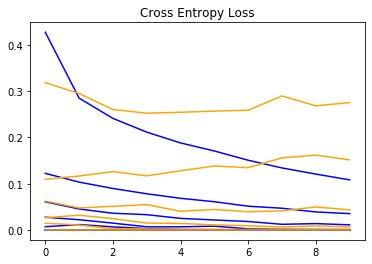

In [53]:
for i in range(len(histories)):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
plt.show()

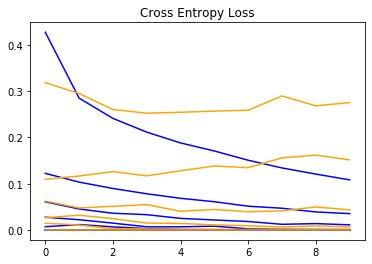

In [54]:
for i in range(len(histories)):
    # plot loss
    plt.title('Cross Entropy Loss')
    plt.plot(histories[i].history['loss'], color='blue', label='train')
    plt.plot(histories[i].history['val_loss'], color='orange', label='test')
plt.show()